<a href="https://colab.research.google.com/github/IvanGrand-tteB/M-L-proj/blob/master/Stock_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM

In [34]:
#Load data

company = "FB"
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9
end = pd.to_datetime(['2021-02-01']).astype(int)[0]//10**9
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'FB' + '?period1='+str(start) + '&period2='+str(end)+ '&interval=1d&events=history'
data = pd.read_csv(url, index_col="Date",parse_dates=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2189 entries, 2012-05-18 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2189 non-null   float64
 1   High       2189 non-null   float64
 2   Low        2189 non-null   float64
 3   Close      2189 non-null   float64
 4   Adj Close  2189 non-null   float64
 5   Volume     2189 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.7 KB


In [35]:
#Harmonize dtypes

data["Volume"] = data["Volume"].astype(float)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2189 entries, 2012-05-18 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2189 non-null   float64
 1   High       2189 non-null   float64
 2   Low        2189 non-null   float64
 3   Close      2189 non-null   float64
 4   Adj Close  2189 non-null   float64
 5   Volume     2189 non-null   float64
dtypes: float64(6)
memory usage: 119.7 KB


In [37]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[i-prediction_days:i, 0])
  y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] , 1))


In [44]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50 , return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)



Epoch 1/25
67/67 [==============================] - 14s 115ms/step - loss: 0.0172
Epoch 2/25
67/67 [==============================] - 8s 117ms/step - loss: 0.0032
Epoch 3/25
67/67 [==============================] - 8s 119ms/step - loss: 0.0026
Epoch 4/25
67/67 [==============================] - 8s 114ms/step - loss: 0.0028
Epoch 5/25
67/67 [==============================] - 8s 114ms/step - loss: 0.0026
Epoch 6/25
67/67 [==============================] - 8s 114ms/step - loss: 0.0024
Epoch 7/25
67/67 [==============================] - 8s 115ms/step - loss: 0.0023
Epoch 8/25
67/67 [==============================] - 8s 114ms/step - loss: 0.0024
Epoch 9/25
67/67 [==============================] - 9s 132ms/step - loss: 0.0023
Epoch 10/25
67/67 [==============================] - 8s 119ms/step - loss: 0.0020
Epoch 11/25
67/67 [==============================] - 8s 116ms/step - loss: 0.0023
Epoch 12/25
67/67 [==============================] - 8s 116ms/step - loss: 0.0019
Epoch 13/25
67/67 [=====

In [45]:
#Load data

test_start = pd.to_datetime(['2021-02-01']).astype(int)[0]//10**9
test_end = pd.to_datetime(['2022-02-01']).astype(int)[0]//10**9
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'FB' + '?period1='+str(start) + '&period2='+str(end)+ '&interval=1d&events=history'
test_data = pd.read_csv(url)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs= total_dataset[len(total_dataset)- len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs= scaler.transform(model_inputs)

#Make ppredictions on Test data
x_test = []

for i in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1], 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


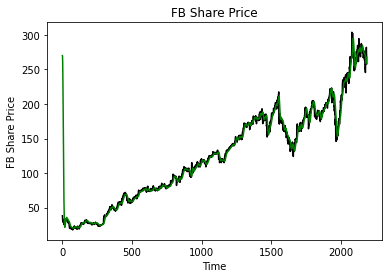

In [46]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#Plot the predicted prices
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f'Predicted {company} Price')
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.show()

In [47]:
#Predict next day
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(predicted_prices)
print(f"Prediction: {prediction}")

Prediction: [[77290.58 ]
 [76750.375]
 [74324.47 ]
 ...
 [74940.68 ]
 [75736.62 ]
 [76575.85 ]]
